Modelo em árvore de decisão desenvolvido pelo grupo DexlLab para o desafio HackCovid19. Tem como objetivo classificar, através do conjunto de dados fornecido, as cores do Protocolo de Manchester para atendimento de saúde.

* Importação de bibliotecas

In [0]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


* Leitura dos dados

In [0]:
df = pd.read_csv('./data.csv')

In [0]:
df.head(2)

,idade,hipertensão,diabetes,asma,oncologia,tosse,coriza,falta de ar,febre,dor de cabeça,pulsação,label
0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,36.7,1.0,88.0,azul
1,44.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37.0,0.0,83.0,azul


In [0]:
df.shape

(50000, 12)

* Embaralhamento dos dados

In [0]:
df = df.sample(frac=1).reset_index(drop=True)

In [0]:
df.head(2)

,idade,hipertensão,diabetes,asma,oncologia,tosse,coriza,falta de ar,febre,dor de cabeça,pulsação,label
0,6.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,38.2,1.0,69.0,amarelo
1,35.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,36.8,0.0,76.0,azul


* Seleção de label do modelo e de atributos para treinamento

In [0]:
X = df[['febre', 'falta de ar', 'pulsação']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

* Treinamento do modelo em árvore de decisão

In [0]:
classifier = DecisionTreeClassifier(max_depth = 3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

* Avaliação do preditor

In [0]:
y_prediction = classifier.predict(X_test)

In [0]:
print(pd.crosstab(y_test, y_prediction, rownames = ['Valor Real'], colnames = ['Valor Predito'], margins = True), '\n\n')

Valor Predito  amarelo  azul  laranja  verde  vermelho    All
Valor Real                                                   
amarelo           1496     0       52    360      1108   3016
azul                 0  2951        0      0         0   2951
laranja              0     0     3005      0         0   3005
verde                0     0        0   2998         0   2998
vermelho             0     0     1882      0      1148   3030
All               1496  2951     4939   3358      2256  15000 




In [0]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

     amarelo       1.00      0.50      0.66      3016
        azul       1.00      1.00      1.00      2951
     laranja       0.61      1.00      0.76      3005
       verde       0.89      1.00      0.94      2998
    vermelho       0.51      0.38      0.43      3030

    accuracy                           0.77     15000
   macro avg       0.80      0.77      0.76     15000
weighted avg       0.80      0.77      0.76     15000



In [0]:
print(accuracy_score(y_test, y_prediction))

0.7732


* Visualização da árvore

In [0]:
dot = StringIO()
nome = list(X.columns)
classe = y

export_graphviz(classifier, out_file = dot, filled = True, rounded = True, feature_names = nome, class_names = classe, proportion = True)

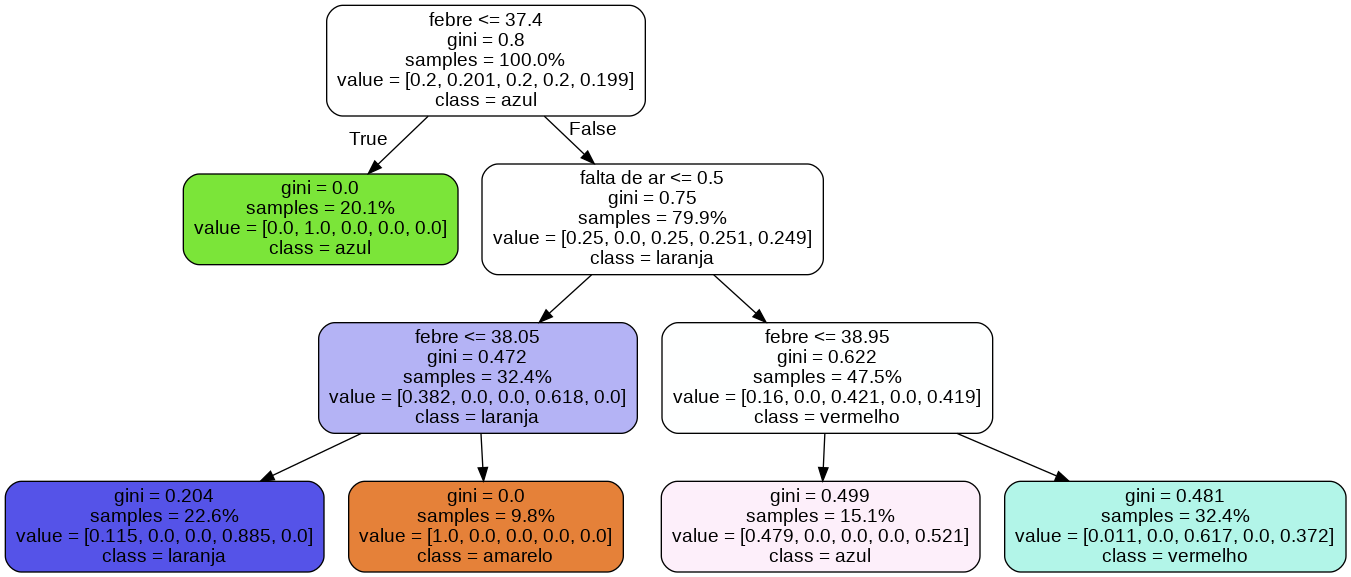

In [0]:
graph = pydotplus.graph_from_dot_data(dot.getvalue())
Image(graph.create_png())

In [0]:
del df, X, y, X_train, X_test, y_train, y_test, classifier, y_prediction, dot, name, classe, graph